Kaggle Dataset Diabetes, Hypertensionand Stroke Prediction:https://www.kaggle.com/datasets/prosperchuks/health-dataset/data

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [23]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 0


Used to shuffle the dataset so that the predictions are not unevely measured.

In [24]:
#Change these paths as needed
data_path = "diabetes_data.csv"
shuffled_data_path =  "shuffled_diabetes_data.csv"

In [25]:
# Load the dataset
df = pd.read_csv(data_path)

#Shuffle the dataframe
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

#Save the shuffled dataframe to a new CSV file
df_shuffled.to_csv(shuffled_data_path, index=False)

# Phase 1

Dataset shape: (70692, 18)
    Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0  10.0  0.0       1.0        1.0  23.0     1.0                   0.0   
1  13.0  0.0       0.0        1.0  33.0     1.0                   0.0   
2   8.0  1.0       1.0        1.0  27.0     1.0                   0.0   
3   7.0  1.0       1.0        1.0  29.0     1.0                   0.0   
4   6.0  1.0       0.0        1.0  47.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0           1.0     0.0      1.0                0.0      4.0       0.0   
1           0.0     1.0      1.0                0.0      3.0       0.0   
2           1.0     1.0      1.0                0.0      2.0       0.0   
3           0.0     1.0      0.0                0.0      3.0       0.0   
4           1.0     1.0      1.0                0.0      4.0      30.0   

   PhysHlth  DiffWalk  Stroke  HighBP  Diabetes  
0       0.0       0.0     0.0     0.0  

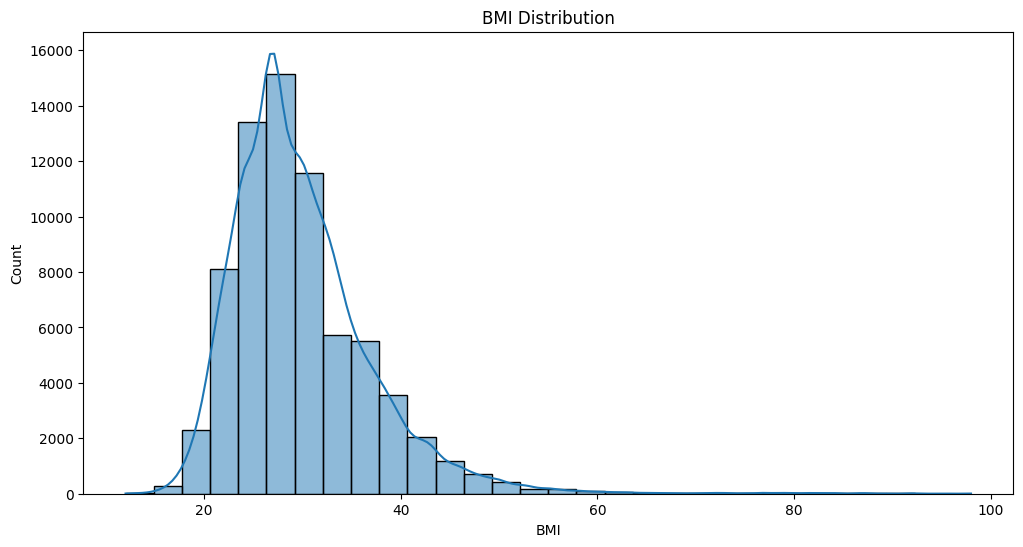

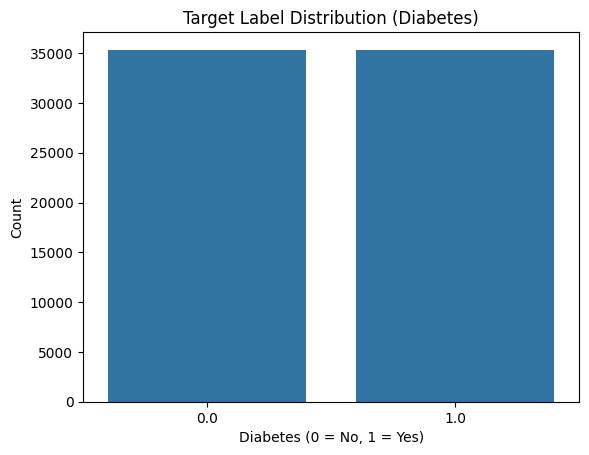

In [26]:

# Display dataset shape and first few rows
print("Dataset shape:", df_shuffled.shape)
print(df_shuffled.head())

# Check for null values
print("\nMissing values:")
print(df_shuffled.isnull().sum())

# Target column: Diabetes (0 or 1)
# Separate features and target
X = df_shuffled.drop(columns=['Diabetes'])
y = df_shuffled['Diabetes']

# Normalize numeric input features
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split into training (90%) and validation (10%) sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.1, random_state=42, stratify=y)

# Print resulting shapes
print("\nTraining set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

# Plot feature distribution examples
plt.figure(figsize=(12, 6))
sns.histplot(X['BMI'], kde=True, bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

sns.countplot(x=y)
plt.title('Target Label Distribution (Diabetes)')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


# Phase 2

Overfitting the data

In [27]:
# Store results
results = []

# Function to build and train model
def train_and_evaluate_model(hidden_layers, neurons_per_layer, input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    for _ in range(hidden_layers):
        model.add(Dense(neurons_per_layer, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(),
                  loss=BinaryCrossentropy(),
                  metrics=['accuracy'])

    history = model.fit(X_scaled, y, epochs=500, verbose=0)
    final_acc = history.history['accuracy'][-1]
    results.append((f"{neurons_per_layer}-neuron x {hidden_layers}-layer", final_acc))
    return model, history

In [28]:
# Test model configurations
layer_sizes = [6]
neuron_options = [512]

for layers in layer_sizes:
    for neurons in neuron_options:
        print(f"Training model: {neurons} neurons x {layers} layers")
        model, history = train_and_evaluate_model(layers, neurons, X_scaled.shape[1])
        if history.history['accuracy'][-1] >= 0.99:
            break  # Stop if we overfit

Training model: 512 neurons x 6 layers


KeyboardInterrupt: 

In [ ]:
# Show results
print("\nOverfitting Results:")
for config, acc in results:
    print(f"{config} => Training Accuracy: {acc:.4f}")


Overfitting Results:
1-neuron x 1-layer => Training Accuracy: 0.7473
2-neuron x 1-layer => Training Accuracy: 0.7491
4-neuron x 1-layer => Training Accuracy: 0.7487
8-neuron x 1-layer => Training Accuracy: 0.7524
16-neuron x 1-layer => Training Accuracy: 0.7535
32-neuron x 1-layer => Training Accuracy: 0.7558
64-neuron x 1-layer => Training Accuracy: 0.7586
128-neuron x 1-layer => Training Accuracy: 0.7628
256-neuron x 1-layer => Training Accuracy: 0.7725
1-neuron x 2-layer => Training Accuracy: 0.4964
2-neuron x 2-layer => Training Accuracy: 0.7502
4-neuron x 2-layer => Training Accuracy: 0.7521
8-neuron x 2-layer => Training Accuracy: 0.7524
16-neuron x 2-layer => Training Accuracy: 0.7564
32-neuron x 2-layer => Training Accuracy: 0.7613
64-neuron x 2-layer => Training Accuracy: 0.7825
128-neuron x 2-layer => Training Accuracy: 0.8285
256-neuron x 2-layer => Training Accuracy: 0.8579
1-neuron x 3-layer => Training Accuracy: 0.4973
2-neuron x 3-layer => Training Accuracy: 0.4969
4-ne

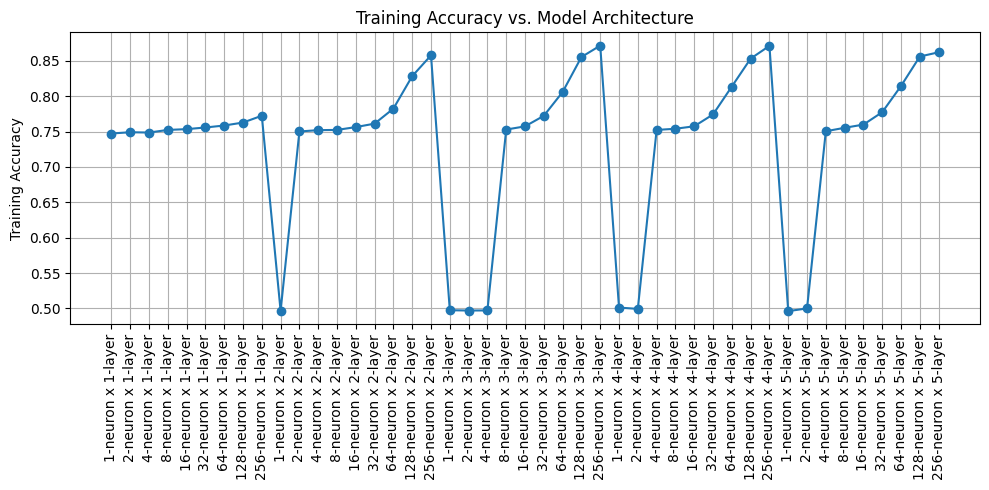

In [ ]:
# Plot accuracy vs model size
labels = [config for config, acc in results]
accuracies = [acc for config, acc in results]

plt.figure(figsize=(10, 5))
plt.plot(labels, accuracies, marker='o')
plt.xticks(rotation=90)
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs. Model Architecture")
plt.grid(True)
plt.tight_layout()
plt.show()

# Phase 3: Model Selection and Evaluation

In [ ]:
# Store evaluation results
evaluation_results = []

# Wrapper function to build and train model for Phase 3
#This function is built from the same function in Phase 2
def train_and_evaluate_model_phase3(hidden_layers, neurons_per_layer, input_dim, model_name):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    for _ in range(hidden_layers):
        model.add(Dense(neurons_per_layer, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

    checkpoint = ModelCheckpoint(f'{model_name}_best.keras', monitor='val_loss', save_best_only=True, mode='min')
    model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[checkpoint], verbose=0)

    preds = np.round(model.predict(X_val)).flatten()
    acc = accuracy_score(y_val, preds)
    precision = precision_score(y_val, preds)
    recall = recall_score(y_val, preds)
    f1 = f1_score(y_val, preds)
    params = model.count_params()
    evaluation_results.append((model_name, acc, precision, recall, f1, params))

In [ ]:
# 1. Random Baseline Classifier
random_preds = np.random.choice([0, 1], size=y_val.shape)
random_acc = accuracy_score(y_val, random_preds)
random_precision = precision_score(y_val, random_preds)
random_recall = recall_score(y_val, random_preds)
random_f1 = f1_score(y_val, random_preds)
evaluation_results.append(("Random Baseline", random_acc, random_precision, random_recall, random_f1, "-"))

In [ ]:
# 2. Logistic Regression (no hidden layers)
train_and_evaluate_model_phase3(hidden_layers=0, neurons_per_layer=1, input_dim=X_train.shape[1], model_name="Logistic Regression")


221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step


In [ ]:
# 3. Neural Network Architectures to Evaluate
architectures = {
    "64-32-16-8-1": [64, 32, 16, 8],
    "32-16-8-1": [32, 16, 8],
    "16-8-1": [16, 8],
    "8-1": [8],
    "4-1": [4],
    "2-1": [2]
}

for name, layers in architectures.items():
    hidden_layers = len(layers)
    neurons_per_layer = layers[0]  # We pass the size of the first hidden layer
    train_and_evaluate_model_phase3(hidden_layers, neurons_per_layer, X_train.shape[1], model_name=name)

221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step


In [ ]:
# Summarize Results
results_df = pd.DataFrame(evaluation_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "# Parameters"])
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score  # Parameters
0  Logistic Regression  0.743564   0.734477  0.762942  0.748439            18
1         64-32-16-8-1  0.729420   0.707629  0.781895  0.742911         13697
2            32-16-8-1  0.740170   0.727248  0.768600  0.747352          2721
3               16-8-1  0.747949   0.719619  0.812447  0.763221           577
4                  8-1  0.748373   0.718953  0.815559  0.764215           153
5                  4-1  0.747242   0.726073  0.794059  0.758546            77
6                  2-1  0.741726   0.735464  0.755021  0.745114            39


In [ ]:
# Identify Best Model
best_model = results_df.sort_values(by="Accuracy", ascending=False).iloc[0]
print("\nBest Performing Model:")
print(best_model)


Best Performing Model:
Model                8-1
Accuracy        0.748373
Precision       0.718953
Recall          0.815559
F1 Score        0.764215
# Parameters         153
Name: 4, dtype: object


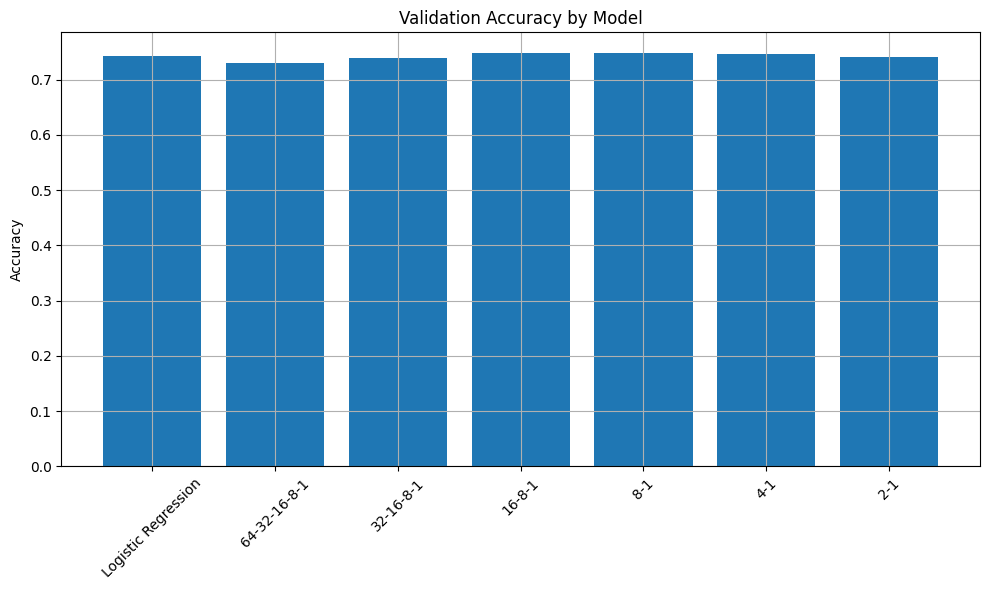

In [ ]:
# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'])
plt.xticks(rotation=45)
plt.title('Validation Accuracy by Model')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()